# 第11回

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./baseball2019.csv", index_col=0)

In [12]:
Y = df["推定年俸(万円)"]
X = df["打率"]
beta = np.polyfit(X, Y, 1)
beta

array([285735.95724755, -61478.49378941])

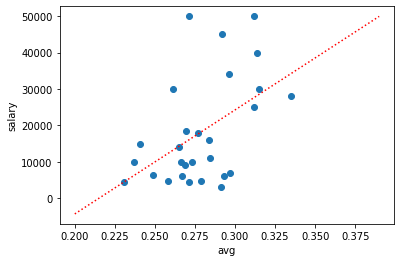

In [8]:
x=np.arange(0.2, 0.4, 0.01)
yhat = x*beta[0] + beta[1]
plt.plot(x, yhat, color="red", linestyle="dotted")
plt.scatter(X, Y)

plt.xlabel("avg")
plt.ylabel("salary")
plt.show()

In [30]:
beta_poly = np.polynomial.Polynomial.fit(X, Y, 1)
# 誤差を最小にするためにパラメータに変換が加えられているのでリセット（値域と定義域の変換）
beta_poly = beta_poly.convert(domain=(-1, 1))
beta_poly

Polynomial([-61478.49378941, 285735.95724755], domain=[-1.,  1.], window=[-1.,  1.])

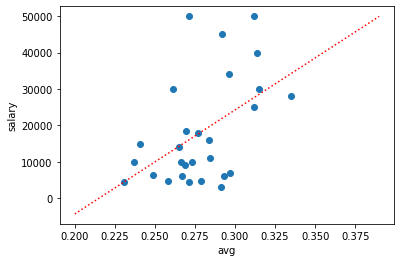

In [32]:
x=np.arange(0.2, 0.4, 0.01)
# 0次, 1次, ... の順番で係数が格納されています
a, b1 = beta_poly.coef
yhat = a + b1*x
# 多項式を関数と見なして直接xをy写すこともできます
# yhat = beta_poly(x)

plt.plot(x, yhat, color="red", linestyle="dotted")
plt.scatter(X, Y)

plt.xlabel("avg")
plt.ylabel("salary")
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

In [46]:
ave = df[["打率"]]
salary = df[["推定年俸(万円)"]]

In [47]:
model = LinearRegression()
model.fit(ave, salary)

LinearRegression()

In [48]:
ybar = model.predict(ave)

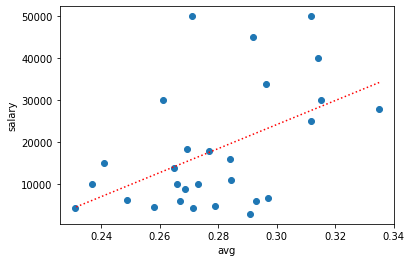

In [49]:
plt.scatter(ave, salary)
plt.plot(ave, ybar, color = "red", linestyle="dotted")
plt.xlabel("avg")
plt.ylabel("salary")
plt.show()